In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def simulate_dynamics(x,T,controller,m):
    """
    Given 
        an initial condition x (position = x[0], velocity = x[1])
        a vector of times T
        a function such that F = controller(x)
        the mass of the object m
    Compute a simulation of Newton's second law with these dynamics
    """
    n = len(T)
    X = np.zeros((2,n))
    X[:,0] = x
    
    # Here is a more general way to simulate the dynamics
    A = np.array([[0.,1.],[0.,0.]])
    B = np.array([0.,1./m])
    
    for k in range(n-1):
        F = controller(x)
        x_dot = np.dot(A,x)+np.dot(B,F)
        dt = T[k+1] - T[k]
        x = x + x_dot * dt
        X[:,k+1] = x
        
    linepos, = plt.plot(T,X[0])
    linevel, = plt.plot(T,X[1])
    plt.legend((linepos,linevel),('Position','Velocity'),loc='best')
    

In the code above, we have defined a function that simulates the dynamics for any controller. 

Often times the goal of a controller is to bring the position and velocity to zero.

Let's try it out with a simple strategy called *proportional control*. It has the name because the control force is directly proportional to the position.

In [23]:
def P_control(x):
    kP = 1.0
    p = x[0]
    return -kP * p

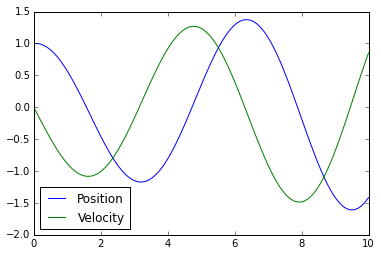

In [24]:
p = 1
v = 0
# Stack the position and velocity up into one vector
x = np.array([p,v])

m = 1
T = np.linspace(0,10,100) # 0, 0.01, 0.02, 0.03, . . . 

simulate_dynamics(x,T,P_control,m)


We see that the position and velocity oscillate. It is actually a bit worse than this, because small inaccuracies due to the approximations we made earlier accumulate, making the oscillations grow without bound.

You can modify the code above changing initial conditions (`p` and `v`), the time steps `T`, and the gain term `kP`. You'll still have these problems!

Let's try a somewhat more sophisticated control law called *propoprtional-derivative* control. It still has a term that is proportional to the position, but it also has a term that is proportional to the velocity. This is called the *derivative* term, since in calculus, velocity is the derivative of position.

In [17]:
def PD_control(x):
    kP = 1.
    kD = 1.
    p = x[0]
    v = x[1]
    return -kP * p - kD * v

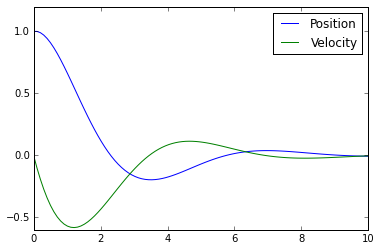

In [25]:
p = 1
v = 0
# Stack the position and velocity up into one vector
x = np.array([p,v])

m = 1
T = np.linspace(0,10,100) # 0, 0.01, 0.02, 0.03, . . . 

simulate_dynamics(x,T,PD_control,m)

Much better!

Again, you can modify gains and starting conditions, but you'll typically get something similar.